In [2]:
%load_ext autoreload
%autoreload 1
%aimport pygenesig.pybioqc
%aimport pygenesig.tools
%aimport pygenesig.file_formats
%matplotlib inline


from pygenesig.pybioqc import * 
from pygenesig.bioqc import * 
from pygenesig.tools import * 
from pygenesig.file_formats import * 
from scipy.stats import mannwhitneyu
import pandas as pd
from pylab import * 
import seaborn as sns

In [3]:
exprs = read_expr("../pygenesig-example/data_processed/v6/exprs.npy")
target = read_target("../pygenesig-example/data_processed/v6/target.csv")
rosetta = read_rosetta("../pygenesig-example/data_processed/v6/rosetta.csv", inverse=True)

In [4]:
exprs_m = read_expr("../pygenesig-example/data_processed/mouseGNF/exprs.npy")
target_m = read_target("../pygenesig-example/data_processed/mouseGNF/target.csv")
rosetta_m = read_rosetta("../pygenesig-example/data_processed/mouseGNF/rosetta.csv", inverse=True)

In [5]:
signatures = load_gmt("../pygenesig-example/results/gtex_v6_solid_gini_0.8_1/signatures.gmt")
signatures_ind = translate_signatures(signatures, rosetta, ignore_missing=True)
signatures_ind = {
    tissue: np.array(inds) for tissue, inds in signatures_ind.items()
}
signatures_ind_m = translate_signatures(signatures, rosetta_m, ignore_missing=True)

In [6]:
target_m

array(['adipose_brown', 'adipose_brown', 'adipose_white', 'adipose_white',
       'adrenal_gland', 'adrenal_gland', 'amygdala', 'amygdala',
       'B-cells_marginal_zone', 'B-cells_marginal_zone', 'bladder',
       'bladder', 'bone', 'bone', 'bone_marrow', 'bone_marrow',
       'cerebellum', 'cerebellum', 'cerebral_cortex', 'cerebral_cortex',
       'cerebral_cortex_prefrontal', 'cerebral_cortex_prefrontal',
       'ciliary_bodies', 'ciliary_bodies', 'common_myeloid_progenitor',
       'common_myeloid_progenitor', 'cornea', 'cornea',
       'dendritic_cells_lymphoid_CD8a+', 'dendritic_cells_lymphoid_CD8a+',
       'dendritic_cells_myeloid_CD8a-', 'dendritic_cells_myeloid_CD8a-',
       'dendritic_plasmacytoid_B220+', 'dendritic_plasmacytoid_B220+',
       'dorsal_root_ganglia', 'dorsal_root_ganglia', 'dorsal_striatum',
       'dorsal_striatum', 'epidermis', 'epidermis', 'eyecup', 'eyecup',
       'follicular_B-cells', 'follicular_B-cells',
       'granulo_mono_progenitor', 'granulo_mon

In [20]:
target_name = {
    'tissue1': 'Pancreas',
    'tissue2': 'Liver'
}

In [21]:
target_name_m = {
    'tissue1': 'pancreas',
    'tissue2': 'liver'
}

In [22]:
sig_name = {
    'tissue1': 'Pancreas',
    'tissue2': 'Liver'
}

In [23]:
np.where(target == target_name['tissue1'])

(array([6116, 6117, 6118, 6119, 6120, 6121, 6122, 6123, 6124, 6125, 6126,
        6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6136, 6137,
        6138, 6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148,
        6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159,
        6160, 6161, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170,
        6171, 6172, 6173, 6174, 6175, 6176, 6177, 6178, 6179, 6180, 6181,
        6182, 6183, 6184, 6185, 6186, 6187, 6188, 6189, 6190, 6191, 6192,
        6193, 6194, 6195, 6196, 6197, 6198, 6199, 6200, 6201, 6202, 6203,
        6204, 6205, 6206, 6207, 6208, 6209, 6210, 6211, 6212, 6213, 6214,
        6215, 6216, 6217, 6218, 6219, 6220, 6221, 6222, 6223, 6224, 6225,
        6226, 6227, 6228, 6229, 6230, 6231, 6232, 6233, 6234, 6235, 6236,
        6237, 6238, 6239, 6240, 6241, 6242, 6243, 6244, 6245, 6246, 6247,
        6248, 6249, 6250, 6251, 6252, 6253, 6254, 6255, 6256, 6257, 6258,
        6259, 6260, 6261, 6262, 6263, 

In [24]:
np.where(target == target_name['tissue2'])

(array([4789, 4790, 4791, 4792, 4793, 4794, 4795, 4796, 4797, 4798, 4799,
        4800, 4801, 4802, 4803, 4804, 4805, 4806, 4807, 4808, 4809, 4810,
        4811, 4812, 4813, 4814, 4815, 4816, 4817, 4818, 4819, 4820, 4821,
        4822, 4823, 4824, 4825, 4826, 4827, 4828, 4829, 4830, 4831, 4832,
        4833, 4834, 4835, 4836, 4837, 4838, 4839, 4840, 4841, 4842, 4843,
        4844, 4845, 4846, 4847, 4848, 4849, 4850, 4851, 4852, 4853, 4854,
        4855, 4856, 4857, 4858, 4859, 4860, 4861, 4862, 4863, 4864, 4865,
        4866, 4867, 4868, 4869, 4870, 4871, 4872, 4873, 4874, 4875, 4876,
        4877, 4878, 4879, 4880, 4881, 4882, 4883, 4884, 4885, 4886, 4887,
        4888, 4889, 4890, 4891, 4892, 4893, 4894, 4895, 4896, 4897, 4898,
        4899, 4900, 4901, 4902, 4903, 4904, 4905, 4906, 4907]),)

In [25]:
s_ind = {
    'tissue1': np.flatnonzero(target_m == target_name_m['tissue1'])[0],
    'tissue2': np.flatnonzero(target_m == target_name_m['tissue2'])[0]
}
s_ind

{'tissue1': 118, 'tissue2': 66}

In [26]:
s = {
    tissue: exprs_m[:, i] for tissue, i in s_ind.items()
}

In [27]:
ind = {
    tissue: np.array([True if i in signatures_ind_m[name] else False for i in range(exprs_m.shape[0])])
    for tissue, name in sig_name.items()
}

In [29]:
rel_rk = {
    tissue: pd.DataFrame(exprs[:, target == target_name[tissue]]).rank(
        axis=0, ascending=False).iloc[signatures_ind[sig_name[tissue]], :].median(axis=0).median() / exprs.shape[0] for tissue in s
}
rel_rk

{'tissue1': 0.022416057024948415, 'tissue2': 0.02013380854123679}

In [13]:
size = {
    tissue: sum(t_ind) for tissue, t_ind in ind.items()
}
size

{'tissue1': 322, 'tissue2': 45}

In [14]:
overlap = jaccard_ind(*(signatures_ind[sig_name[tissue]] for tissue in s))
overlap

0.0054794520547945206

In [15]:
def mix(x, y, prop_x):
    return x * prop_x + y * (1 - prop_x)

In [16]:
def wmw_r_corr(x, y, u, u_exp):
    return 1 - (2 * (u - u_exp)) / (x.size * y.size)

In [17]:
mixed = [mix(s['tissue1'], s['tissue2'], f) for f in np.arange(0, 1.01, 0.01)]

In [18]:
wmw_res = {
    tissue:  [mannwhitneyu(s_mixed[~ind[tissue]], s_mixed[ind[tissue]]) for s_mixed in mixed] for 
    tissue in ind
}
wmw_res

{'tissue1': [MannwhitneyuResult(statistic=4562563.5, pvalue=0.00041064170893348364),
  MannwhitneyuResult(statistic=3876008.0, pvalue=1.8586819214525458e-14),
  MannwhitneyuResult(statistic=3447765.0, pvalue=7.7575605801279634e-25),
  MannwhitneyuResult(statistic=3162732.0, pvalue=2.0099726841353666e-33),
  MannwhitneyuResult(statistic=2945691.0, pvalue=7.2914708873413567e-41),
  MannwhitneyuResult(statistic=2769686.0, pvalue=1.8019486353160533e-47),
  MannwhitneyuResult(statistic=2622380.0, pvalue=2.1423483647562473e-53),
  MannwhitneyuResult(statistic=2495753.0, pvalue=8.9092896503674227e-59),
  MannwhitneyuResult(statistic=2384514.0, pvalue=1.0069006328485531e-63),
  MannwhitneyuResult(statistic=2285224.0, pvalue=2.5934123488165399e-68),
  MannwhitneyuResult(statistic=2196047.0, pvalue=1.4207909267284735e-72),
  MannwhitneyuResult(statistic=2115466.0, pvalue=1.5426681589244682e-76),
  MannwhitneyuResult(statistic=2041480.0, pvalue=2.8406163546256606e-80),
  MannwhitneyuResult(statis

In [19]:
wmw_exp = {}
for tissue in ind:
    y = np.repeat(np.percentile(s[tissue], (1- rel_rk[tissue]) * 100), size[tissue])
    u, p = mannwhitneyu(s[tissue], y)
    wmw_exp[tissue] = (wmw_r(s[tissue], y, u), u, p) 
wmw_exp

{'tissue1': (0.95973238291752638, 207368.0, 5.1613217824207884e-208),
 'tissue2': (0.80366410304508218, 141300.0, 3.5576048804926752e-22)}

In [20]:
u_exp = {
    tissue: wmw_u_exp(rel_rk[tissue], size[tissue], s[tissue].size) for tissue in ind
}
u_exp

{'tissue1': 155365.0, 'tissue2': 140265.0}

## BioQC score, corrected and uncorrected

In [21]:
wmw_score_corr = {
    tissue: [-np.log10(p) / -np.log10(wmw_exp[tissue][2]) for u, p in res] for tissue, res in wmw_res.items()
}
wmw_score = {
    tissue: [-np.log10(p) for u, p in res] for tissue, res in wmw_res.items()
}

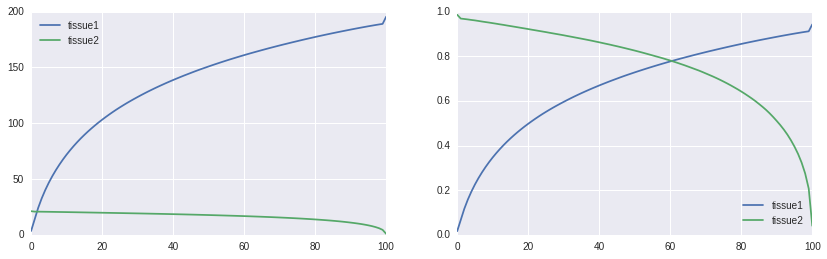

In [22]:
fix, (ax1, ax2) = subplots(1, 2, figsize=(14, 4))
pd.DataFrame(wmw_score).plot(ax=ax1)
pd.DataFrame(wmw_score_corr).plot(ax=ax2)

## $r$ effect size, corrected and uncorrected

In [23]:
r = {
    tissue: [wmw_r(s_mixed[~ind[tissue]], s_mixed[ind[tissue]], u) for u, p in res]
    for s_mixed, (tissue, res) in zip(mixed, wmw_res.items())
}
r_corr = {
    tissue: [wmw_r(s_mixed[~ind[tissue]], s_mixed[ind[tissue]], u) / wmw_exp[tissue][0] for u, p in res]
    for s_mixed, (tissue, res) in zip(mixed, wmw_res.items())
}
r_corr_u = {
    tissue: [wmw_r_corr(s_mixed[~ind[tissue]], s_mixed[ind[tissue]], u, u_exp[tissue]) for u, p in res]
    for s_mixed, (tissue, res) in zip(mixed, wmw_res.items())
}

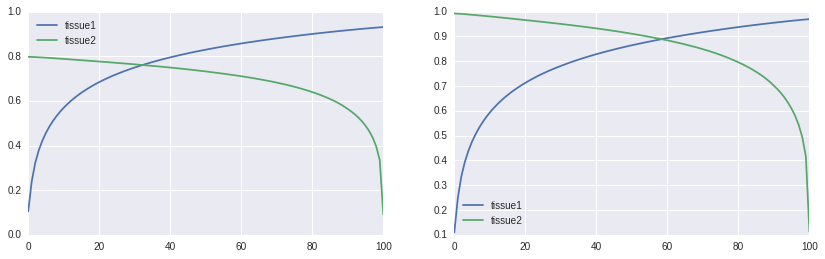

In [24]:
fix, (ax1, ax2) = subplots(1, 2, figsize=(14, 4))
pd.DataFrame(r).plot(ax=ax1)
pd.DataFrame(r_corr).plot(ax=ax2)

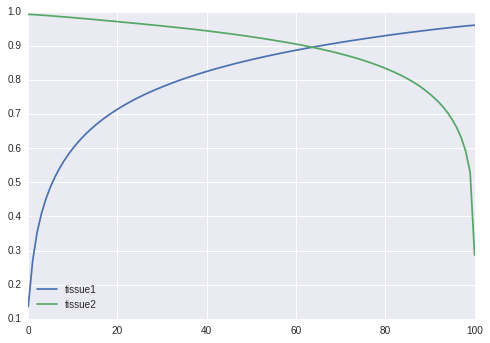

In [25]:
pd.DataFrame(r_corr_u).applymap(lambda x: x).plot()